# EDA

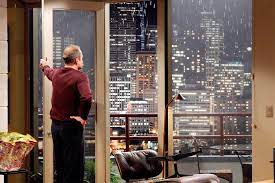

In [73]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

: 

## Import the data from the csv file 

In [34]:
#import the data from a csv-file
df = pd.read_csv('data/eda.csv')
df.head()

,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


### Look into missing values 

<Axes: >

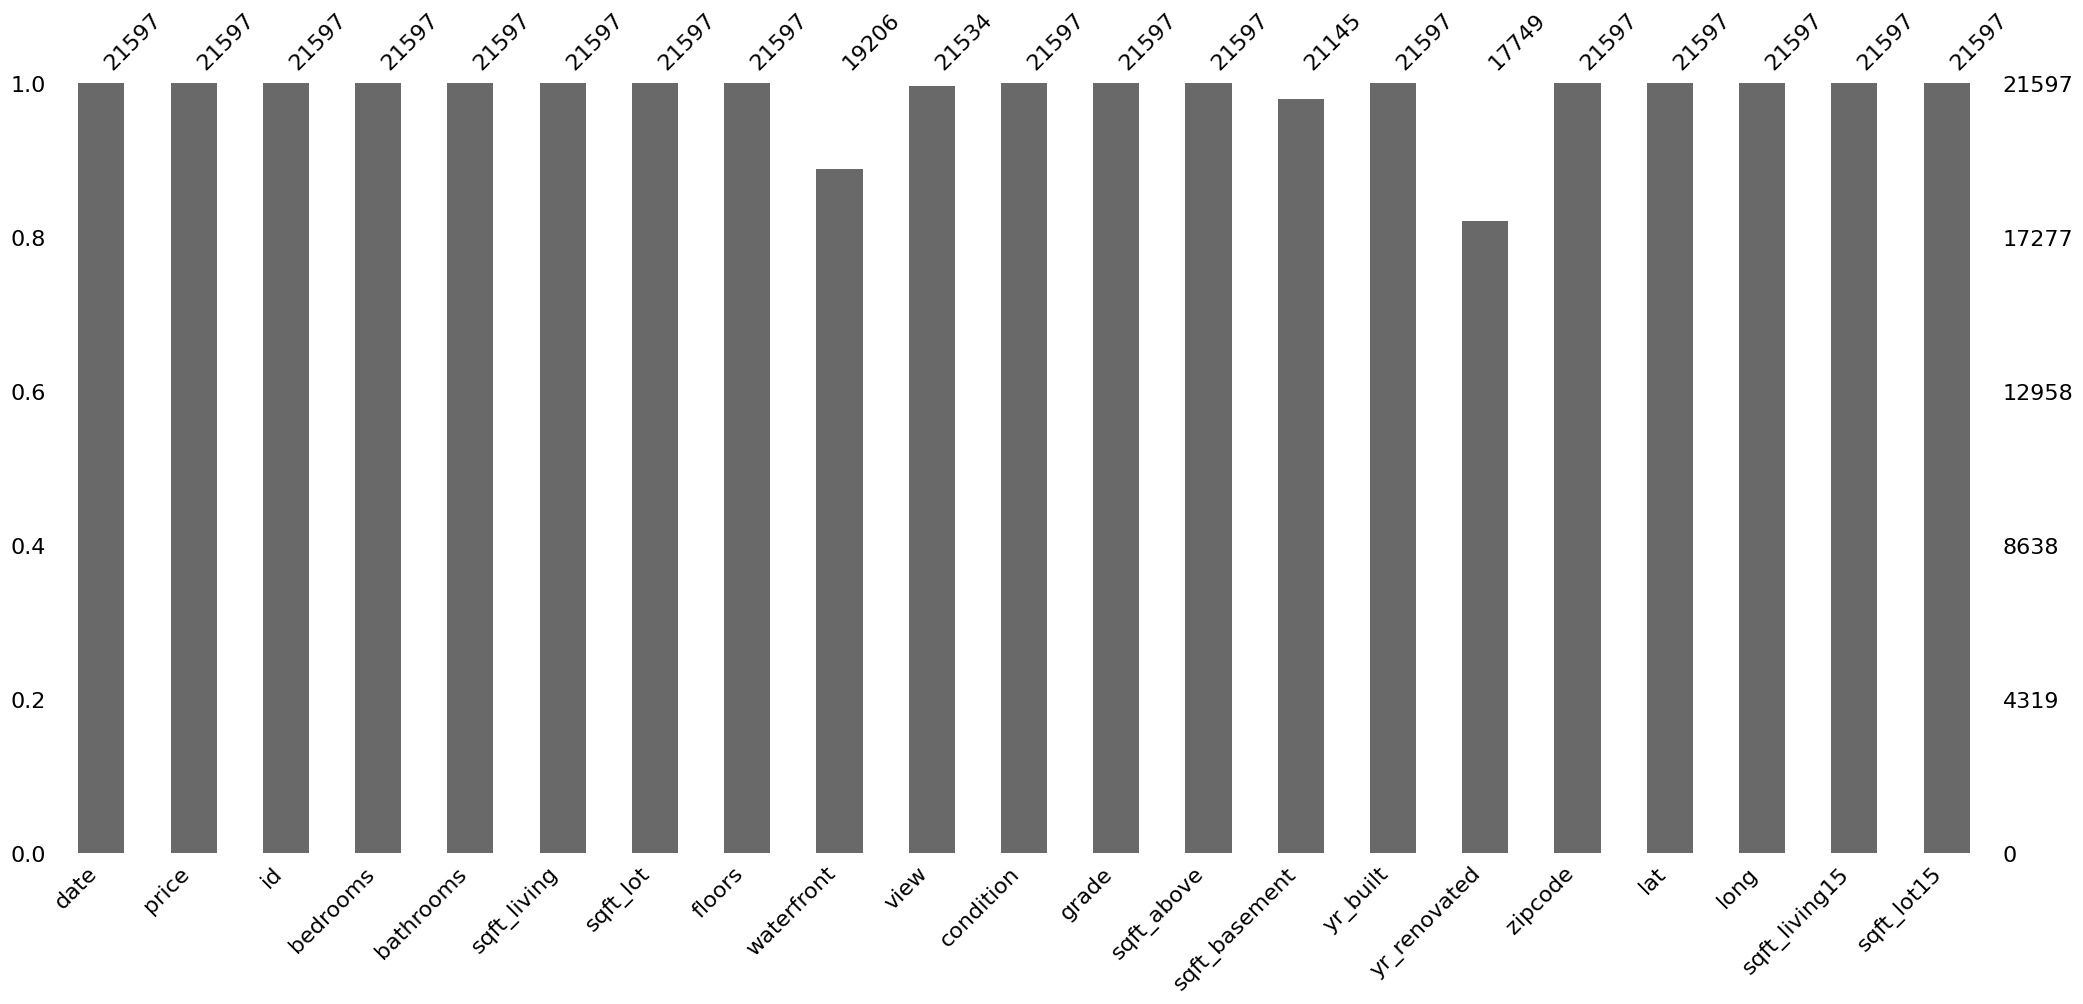

In [35]:
# import missingno
import missingno as msno
# display number of missing values per column
df.isna().sum()
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

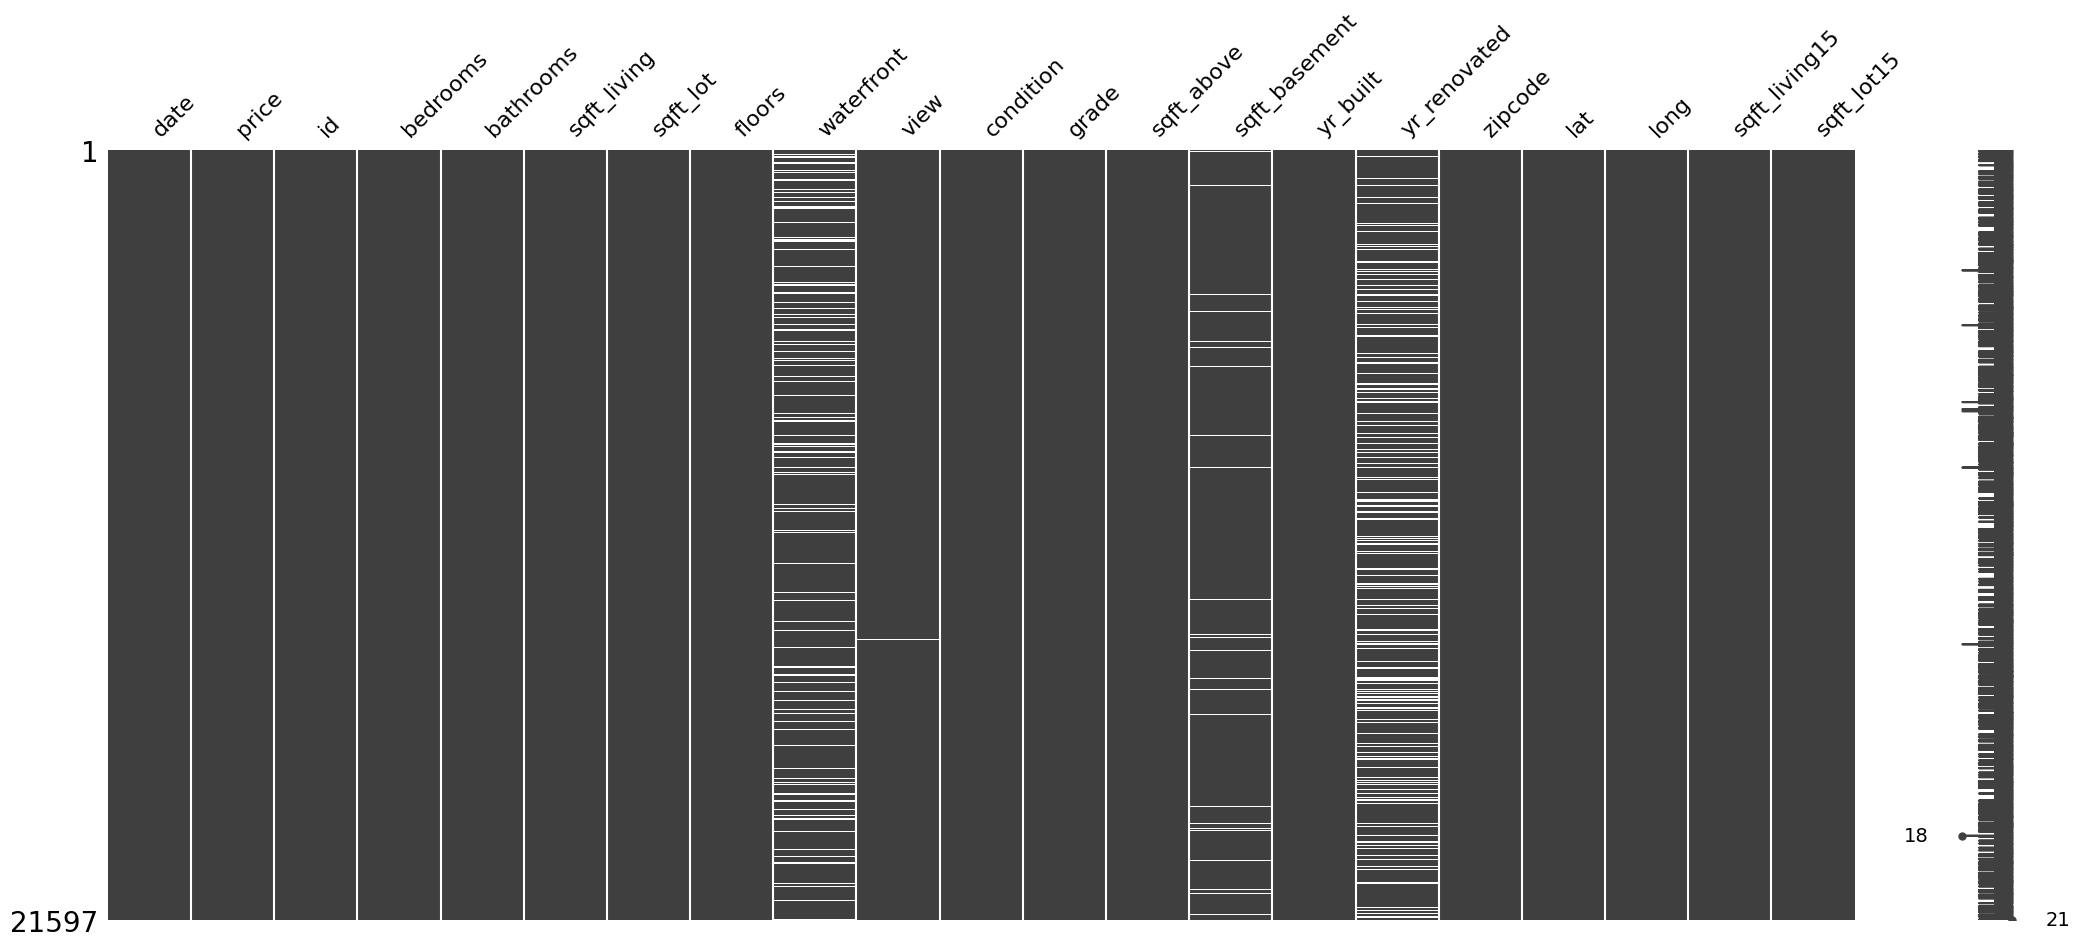

In [36]:
msno.matrix(df)

#### duplicate values 

In [37]:
df.duplicated().value_counts()


False    21597
Name: count, dtype: int64

there are no duplicated values 

In [38]:
#Check the shape of the DataFrame (rows, columns)
df.shape

(21597, 21)

In [39]:
# Display the first few rows of the DataFrame
df.head()


,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [40]:
# Get information about the DataFrame (including null values and data types)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   id             21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [66]:
# Get summary statistics for numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,21597,2014-10-29 04:20:38.171968512,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21597.00,540296.57,78000.00,322000.00,450000.00,645000.00,7700000.00,367368.14
id,21597.00,4580474287.77,1000102.00,2123049175.00,3904930410.00,7308900490.00,9900000190.00,2876735715.75
bedrooms,21597.00,3.37,1.00,3.00,3.00,4.00,33.00,0.93
bathrooms,21597.00,2.12,0.50,1.75,2.25,2.50,8.00,0.77
sqft_living,21597.00,2080.32,370.00,1430.00,1910.00,2550.00,13540.00,918.11
sqft_lot,21597.00,15099.41,520.00,5040.00,7618.00,10685.00,1651359.00,41412.64
floors,21597.00,1.49,1.00,1.00,1.50,2.00,3.50,0.54
waterfront,19206.00,0.01,0.00,0.00,0.00,0.00,1.00,0.09
view,21534.00,0.23,0.00,0.00,0.00,0.00,4.00,0.77


In [42]:
# Check the data types of each column
df.dtypes

date              object
price            float64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below.

- id - unique identified for a house
- dateDate - house was sold
- pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/bedrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors




Data Types of King County House Dataset Columns

| Column Name      | Data Type |
|------------------|-----------|
| date             | object    |
| price            | float64   |
| id               | int64     |
| bedrooms         | float64   |
| bathrooms        | float64   |
| sqft_living      | float64   |
| sqft_lot         | float64   |
| floors           | float64   |
| waterfront       | float64   |
| view             | float64   |
| condition        | int64     |
| grade            | int64     |
| sqft_above       | float64   |
| sqft_basement    | float64   |
| yr_built         | int64     |
| yr_renovated     | float64   |
| zipcode          | int64     |
| lat              | float64   |
| long             | float64   |
| sqft_living15    | float64   |
| sqft_lot15       | float64   |


In [47]:
# transform the date column from string to date typs
# type of first date entry
pd.options.display.float_format = '{:.2f}'.format

type(df['date'][0])

# the date is saved as a string 
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
type(df['date'][0])
# the data is now of type pandas._libs.tslibs.timestamps.Timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
#the price should only contain two decimal places
df['price'] = df['price'].round(2)
#the price unit is $
type(df['price'][0])

df['price'].head()


0   221900.00
1   538000.00
2   180000.00
3   604000.00
4   510000.00
Name: price, dtype: float64

In [54]:
#bedrooms number 
df["bathrooms"].unique()


#except fot the non int values like  1/4   the data does not contain any abnormality 

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [55]:
#bathrooms number 
df["bathrooms"].unique()


array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [62]:
#sqft_living
type(df['sqft_living'][0])
df["sqft_living"].unique()



array([1180., 2570.,  770., ..., 3087., 3118., 1425.])

In [69]:
type(df["floors"][0])
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [72]:
type(df["waterfront"][0])
df["waterfront"].unique()


array([nan,  0.,  1.])